<a href="https://colab.research.google.com/github/LoaiEsam37/TensorFlow_Training/blob/main/Improving_model_with_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# make circles

In [2]:
n_samples = 1000
x, y = make_circles(
    n_samples,
    noise=0.01,
    random_state=42
    )

In [3]:
len(x)

1000

# Split our data: 
# 80% train,
# 20% test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [5]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if len((y_pred[0])) > 1:
      print("Doing multiclass classification")
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("Doing binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [6]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_1 = model_1.fit(x_train, y_train, epochs=100, verbose=0, batch_size=32, callbacks=[lr_scheduler])

model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9612 - accuracy: 0.5000


[0.9611563086509705, 0.5]

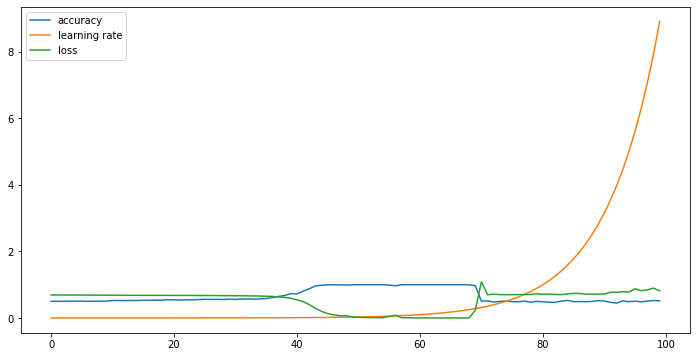

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["lr"])
plt.plot(history_1.history["loss"])
plt.legend(["accuracy", "learning rate", "loss"], loc="upper left")
plt.show()

In [8]:
lr = 1e-4 * 10**(tf.range(100)/20)

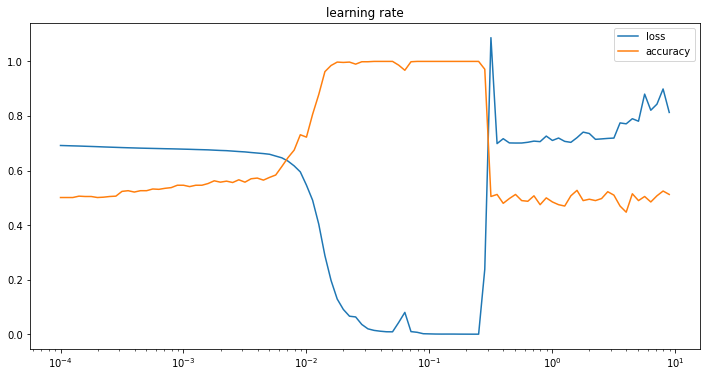

In [9]:
plt.figure(figsize=(12, 6))
plt.semilogx(lr, history_1.history["loss"])
plt.semilogx(lr, history_1.history["accuracy"])
plt.title("learning rate")
plt.legend(["loss", "accuracy"])

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
    metrics=["accuracy"]
)

history_2 = model_2.fit(x_train, y_train, epochs=200, verbose=0, batch_size=32)
model_2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 3.0717e-05 - accuracy: 1.0000


[3.071735773119144e-05, 1.0]

In [11]:
y_pred = model_2.predict(x_test)

7/7 [==============================] - 0s 2ms/step


313/313 [==============================] - 1s 2ms/step
Doing binary classification


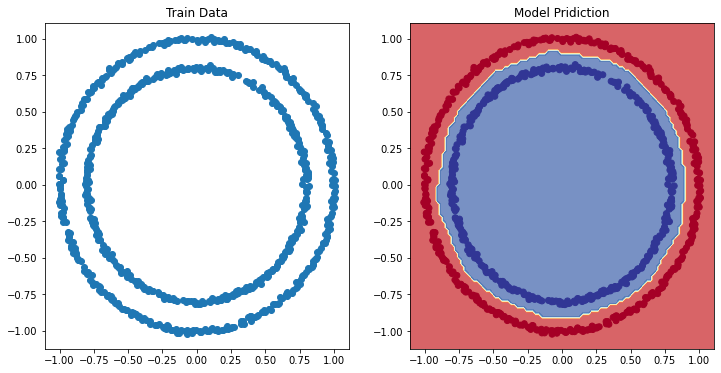

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train Data")
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.subplot(1, 2, 2)
plt.title("Model Pridiction")
plot_decision_boundary(model_2, x_train, y_train)
plt.show()

313/313 [==============================] - 1s 2ms/step
Doing binary classification


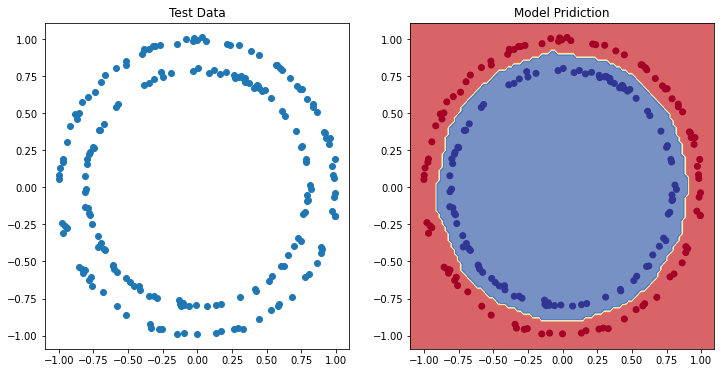

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test Data")
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.subplot(1, 2, 2)
plt.title("Model Pridiction")
plot_decision_boundary(model_2, x_test, y_test)
plt.show()